# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Artificial Intelligence<center></font>
## <font ><center>CA5: FF Neural Network<center></font>
## <center>Teacher: Dr. Fadaei<center>
### <center>Student Name: Mohammadali Shakerdargah<center>
### <center>Student Number: 810098002<center>

In [2]:
!jt -t monokai -T -N -kl

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
from sklearn.utils import shuffle
import copy

# phase 1: 
    1-1- Read data, Show one random image & see the range
    1-2- Show one "img and its class" for all classes in train-set
    1-3- Frequency of any class in train and test data-set
    1-4- Dividing data by 255 & Explanation 
    

## 1-1- Read data, Show one random image & see the range

In [3]:
train_imgs = pd.read_csv("train_images.csv")
train_labels = pd.read_csv("train_labels.csv")
test_imgs = pd.read_csv("test_images.csv")
test_labels = pd.read_csv("test_labels.csv")

In [4]:
train_imgs = train_imgs.drop('Unnamed: 0', 1)
train_labels = train_labels.drop('Unnamed: 0', 1)
test_imgs = test_imgs.drop('Unnamed: 0', 1)
test_labels = test_labels.drop('Unnamed: 0', 1)

In [5]:
train_imgs

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,11,3,11,2,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,23,165,36,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,50,47,56,94,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,4,158,...,255,247,196,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,255,255,76,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


AxesImage(54,36;334.8x217.44)


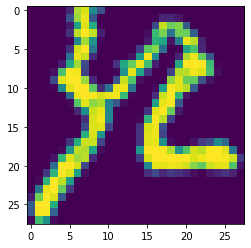

In [8]:
img_num = random.randrange(1,59999)
img_data = train_imgs.iloc[img_num].tolist()
img_data_array = np.reshape(img_data,(28,28))
imgplot = plt.imshow(img_data_array)
print(imgplot)

In [9]:
mins = []
maxes = []
for i in range(len(train_imgs)):
    column = train_imgs[str(0)]
    min_num_in_imgae = column.min()
    mins.append(min_num_in_imgae)
    max_num_in_imgae = column.max()
    maxes.append(max_num_in_imgae)
print(mins)
print(maxes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

We can see that all images pixeels are in the range of [0: 255]

## 1-2- Show one "img and its class" for all classes in train-set

Number of class: 8


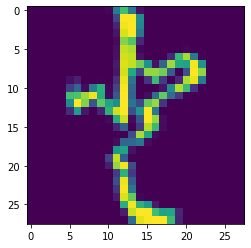

--------------------------------------


Number of class: 4


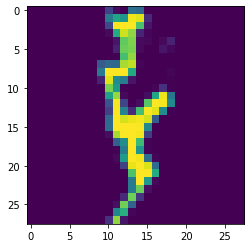

--------------------------------------


Number of class: 19


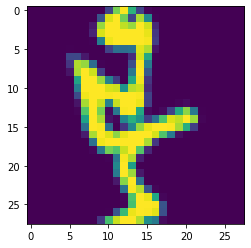

--------------------------------------


Number of class: 16


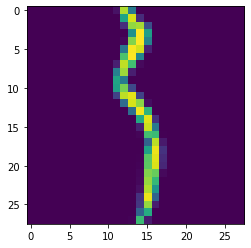

--------------------------------------


Number of class: 17


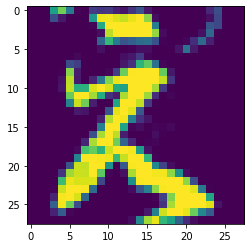

--------------------------------------


Number of class: 12


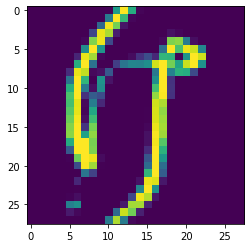

--------------------------------------


Number of class: 11


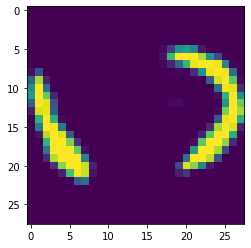

--------------------------------------


Number of class: 13


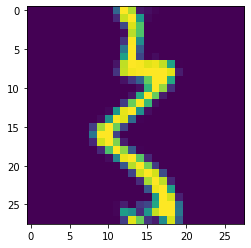

--------------------------------------


Number of class: 14


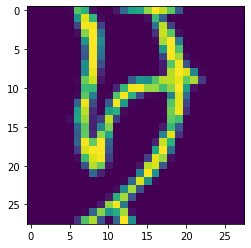

--------------------------------------


Number of class: 7


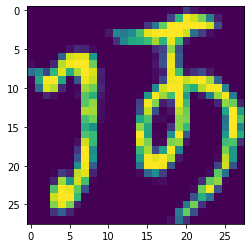

--------------------------------------


Number of class: 10


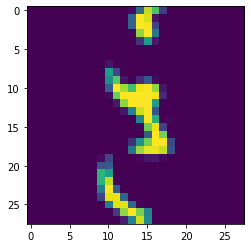

--------------------------------------


Number of class: 6


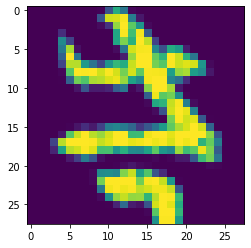

--------------------------------------


Number of class: 1


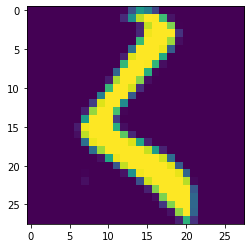

--------------------------------------


Number of class: 9


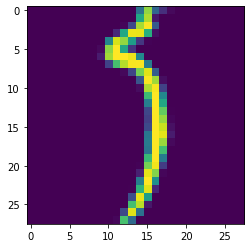

--------------------------------------


Number of class: 3


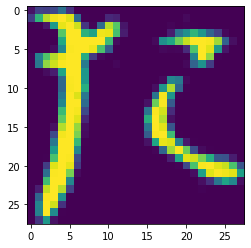

--------------------------------------


Number of class: 15


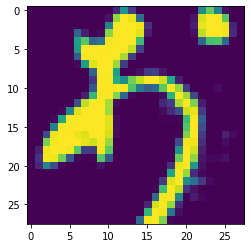

--------------------------------------


Number of class: 18


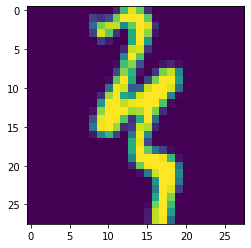

--------------------------------------


Number of class: 2


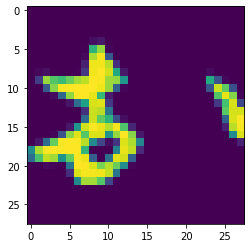

--------------------------------------


Number of class: 5


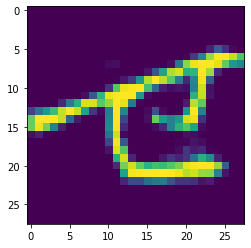

--------------------------------------


Number of class: 0


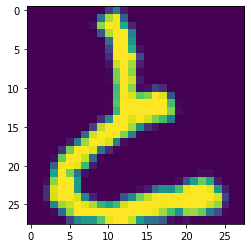

--------------------------------------




In [10]:
class_nums = random.sample(range(0, 20), 20)
for class_num in class_nums:
    for i in range(len(train_labels)):
        if(train_labels["0"][i] == class_num):
            img_data = train_imgs.iloc[class_num].tolist()
            img_data_array = np.reshape(img_data,(28,28))
            imgplot = plt.imshow(img_data_array)
            print(f"Number of class: {class_num}")
            plt.show(imgplot)
            print("--------------------------------------\n\n")
            break

# 1-3- Frequency of any class in train-set and test-set

{11: 3444, 2: 3432, 0: 3426, 4: 3418, 7: 3412, 17: 3409, 10: 3398, 18: 3389, 19: 3388, 12: 3363, 5: 3358, 9: 3357, 15: 3356, 6: 3354, 1: 3344, 8: 2681, 13: 2417, 14: 2209, 16: 1405, 3: 440}


<BarContainer object of 20 artists>

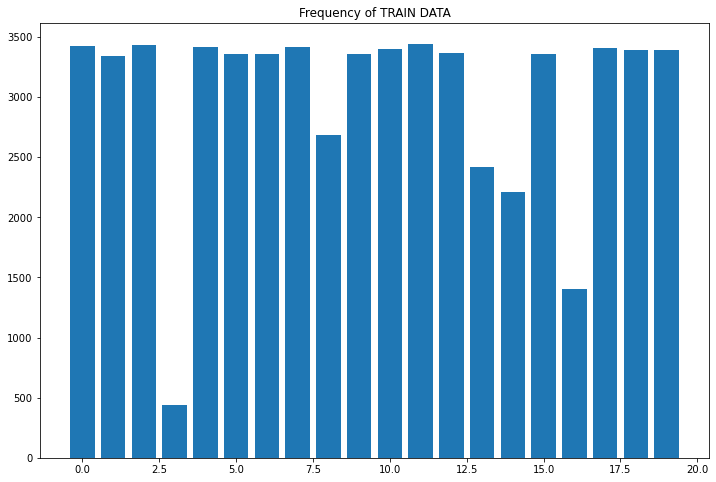

In [11]:
counts_train = train_labels['0'].value_counts().to_dict()
names_train = []
values_train = []
for key in counts_train:
    names_train.append(key)
    values_train.append(counts_train[key])
print(counts_train)
plt.figure(figsize=(12, 8))
plt.title("Frequency of TRAIN DATA")
plt.bar(names_train, values_train)

{4: 871, 1: 862, 9: 856, 2: 856, 10: 855, 5: 855, 15: 854, 7: 852, 12: 851, 18: 850, 6: 846, 0: 844, 17: 843, 19: 838, 11: 837, 8: 649, 13: 587, 14: 532, 16: 355, 3: 107}


<BarContainer object of 20 artists>

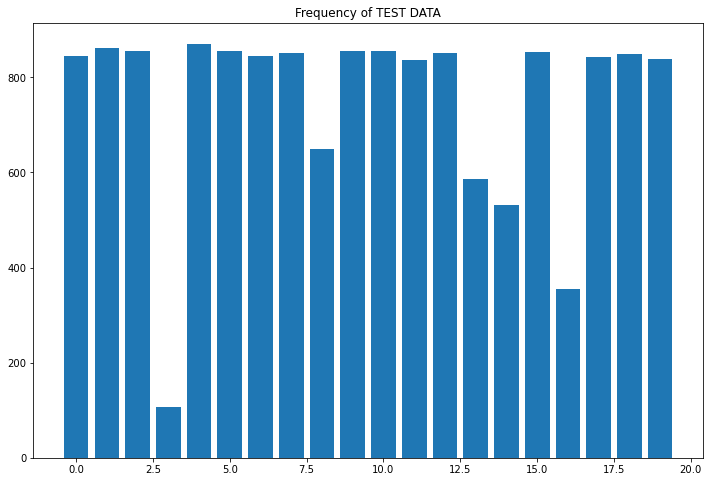

In [12]:
counts_test = test_labels['0'].value_counts().to_dict()
names_test = []
values_test = []
for key in counts_test:
    names_test.append(key)
    values_test.append(counts_test[key])
print(counts_test)
plt.figure(figsize=(12, 8))
plt.title("Frequency of TEST DATA")
plt.bar(names_test, values_test)

# 1-4- Dividing data by 255 & Explanation 
If we divide by 255 the range can be described with a 0.0-1.0 where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF). 

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
Also two more benifits:
- Normalization will help us remove distortions caused by lights and shadows in an image and get away from this problem.
- It is always easier for machine to work wit smaller numbers

In [13]:
train_imgs = train_imgs/255

In [14]:
test_imgs = test_imgs/255

# phase 2: 
    Filling """ToDO""" in the class that is defined above.
    

# Dataloader

In [345]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = np.array(data)
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors_list = []
        for i in range(len(labels)):
            onehot_vectors_i = np.zeros(n_classes)
            classNum = labels[i]
            onehot_vectors_i[classNum] = 1
            onehot_vectors_list.append(onehot_vectors_i)
        onehot_vectors = np.array(onehot_vectors_list)
        return onehot_vectors
    
    def shuffle_dataset(self):
        self.__data, self.__onehot_labels = shuffle(self.__data, self.__onehot_labels, random_state=0)
    
    def __iter__(self):
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))
    def print_data(self):
        print(self.__data)
    def print_oneHot(self):
        print(self.__onehot_labels)

In [121]:
dataLoader = Dataloader(train_imgs_array, train_labels_array, 20)
dataLoader.print_data()
dataLoader.shuffle_dataset()
print('----------------------------------------------------------------')
dataLoader.print_data()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
----------------------------------------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Activation Functions

In [346]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
#         identical_value = np.matrix(matrix, dtype=float)
        identical_value = np.array(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        identical_derivative = np.matrix(matrix, dtype=float)
#         identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        identical_derivative[identical_derivative  != 1] = 1
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        relu_value = np.array(matrix, dtype=float)
        relu_value = np.maximum(relu_value, 0)
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.array(matrix, dtype=float)
        relu_derivative = np.where(relu_derivative > 0, 1, 0)
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        leacky_relu_value = np.array(matrix, dtype=float)
        leacky_relu_value = np.where(leacky_relu_value > 0, leacky_relu_value, leacky_relu_value* 0.01)        
        return leacky_relu_value

    def derivative(self, matrix):
        leacky_relu_derivative = np.array(matrix, dtype=float)
        leacky_relu_derivative = np.where(leacky_relu_derivative > 0, 1, self.negative_slope)
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        sigmoid_value = np.array(matrix, dtype=float)
        sigmoid_value = 1/(1+np.exp(-sigmoid_value))
        return sigmoid_value

    def derivative(self, matrix):
        sigmoid_derivative = np.array(matrix, dtype=float)
        sigmoid_derivative = (1/(1+np.exp(-sigmoid_derivative)))*(1-(1/(1+np.exp(-sigmoid_derivative))))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        softmax_value = np.array(matrix, dtype=float)
#         print(softmax_value)
        for i in range(len(softmax_value)):
          max = np.max(softmax_value[i])
          num = np.exp(np.subtract(softmax_value[i], max))
          den = np.sum(num)
          softmax_value[i] = np.divide(num, den)
        return np.clip(softmax_value,10**(-40),1)
    
    def __call__(self, matrix):
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): pass

    def __val(self, matrix):
        tanh_value = np.array(matrix, dtype=float)
        tanh_value = np.tanh(tanh_value)
        return tanh_value

    def derivative(self, matrix):
        tanh_derivative = np.array(matrix, dtype=float)
        tanh_derivative = (1-(np.tanh(tanh_derivative))*(np.tanh(tanh_derivative)))
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

In [28]:
#identity test
a= np.array([[1, 0, 3, -1, 4],[2, -2, 6, -7, 5]])
identical = Identical()
func_val = identical(a)
derivative = identical.derivative(a)
print(func_val)
print(derivative)

[[ 1.  0.  3. -1.  4.]
 [ 2. -2.  6. -7.  5.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [31]:
#relu test
a= np.array([[1, 0, 3, -1, 4],[2, -2, 6, -7, 5]])
relu = Relu()
func_val = relu(a)
derivative = relu.derivative(a)
print(func_val)
print(derivative)

[[1. 0. 3. 0. 4.]
 [2. 0. 6. 0. 5.]]
[[1 0 1 0 1]
 [1 0 1 0 1]]


In [32]:
#LeakyRelu test
a = np.array([[1, 0, 3, -1, 4],[2, -2, 6, -7, 5]])
leakyRelu = LeakyRelu()
func_val = leakyRelu(a)
derivative = leakyRelu.derivative(a)
print(func_val)
print(derivative)

[[ 1.    0.    3.   -0.01  4.  ]
 [ 2.   -0.02  6.   -0.07  5.  ]]
[[1.   0.01 1.   0.01 1.  ]
 [1.   0.01 1.   0.01 1.  ]]


In [48]:
#Sigmoid test
a = np.array([[1, 0, 3, -1, 4],[2, -2, 6, -7, 5]])
sigmoid = Sigmoid()
func_val = sigmoid(a)
derivative = sigmoid.derivative(a)
print(func_val)
print(derivative)

[[7.31058579e-01 5.00000000e-01 9.52574127e-01 2.68941421e-01
  9.82013790e-01]
 [8.80797078e-01 1.19202922e-01 9.97527377e-01 9.11051194e-04
  9.93307149e-01]]
[[0.19661193 0.25       0.04517666 0.19661193 0.01766271]
 [0.10499359 0.10499359 0.00246651 0.00091022 0.00664806]]


In [261]:
#softmax test
a = np.array([1, 0, 3, -1, 4])
softmax = Softmax()
func_val = softmax(a)
print(func_val)

[0.03450917 0.01269521 0.25499017 0.00467031 0.69313514]


In [53]:
#Tanh test
a = np.array([[1, 0, 3, -1, 4],[2, -2, 6, -7, 5]])
tanh = Tanh()
func_val = tanh(a)
derivative = tanh.derivative(a)
print(func_val)
print(derivative)

[[ 0.76159416  0.          0.99505475 -0.76159416  0.9993293 ]
 [ 0.96402758 -0.96402758  0.99998771 -0.99999834  0.9999092 ]]
[[4.19974342e-01 1.00000000e+00 9.86603717e-03 4.19974342e-01
  1.34095068e-03]
 [7.06508249e-02 7.06508249e-02 2.45765474e-05 3.32610934e-06
  1.81583231e-04]]


# Loss Function

In [351]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass
    
    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
#         print(expected_val)
#         print(true_val)
        cross_entropy_value = np.sum(np.multiply(expected_val, np.log10(true_val))) * (-1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
#         print('shpae_true_val',np.shape(true_val),"shape_expected_val",np.shape(expected_val))
        assert np.shape(true_val)==np.shape(expected_val)
#         cross_entropy_derivative = np.array(true_val) - np.array(expected_val)
        cross_entropy_derivative = true_val - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

In [324]:
#Test CrossEntropy
a = np.array([[0.1, 0.5, 0.4, 0.6]])
b = np.array([[0.1, 0.5, 0.45, 0.6]])
ce = CrossEntropy()
func_val = ce(a,b)
derivative = ce.derivative(a,b)
print(func_val)
print(derivative)

0.5626972515042213
[[ 0.    0.   -0.05  0.  ]]


In [ ]:
a = np.zeros()

# Layer

![title](img/One.png) 
![title](img/Two.jpg) 
![title](img/Three_1.jpg) 
![title](img/Three_2.jpg) 

In [352]:
class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
#         print(np.size(self.__weight,0))
#         print(np.size(layer_input,1))
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = layer_input
        self.__last_activation_input = np.dot(layer_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_output)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
#         print("backprop_tensor: ",backprop_tensor)          
#         print( "__last_activation_derivative: ", (self.__last_activation_derivative))
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        self.__weight -= lr * np.dot(np.transpose(self.__last_input), 
                                np.array(backprop_tensor)*
                                np.array(self.__last_activation_derivative))
        self.__bias -= lr * np.array(backprop_tensor) * np.array(self.__last_activation_derivative)
        backprop_tensor = np.dot(np.array(backprop_tensor)*np.array(self.__last_activation_derivative), np.transpose(self.__weight))
        
#         self.__weight -=  lr * np.dot((backprop_tensor * self.__last_activation_derivative), np.transpose(self.__last_input))              
#         self.__bias -= lr * backprop_tensor * self.__last_activation_derivative
#         backprop_tensor = np.dot(np.transpose(self.__weight), backprop_tensor * self.__last_activation_derivative)
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low=low, high=high, size=(dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        
        weights = np.random.normal(loc=mean, scale=var, size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    @n_neurons.setter
    def n_neurons(self, num_neurons):
        self.__n_neurons = num_neurons
    
    @property
    def weight(self): return self.__weight
    @weight.setter
    def weight(self, weight_new): 
        self.__weight = weight_new
    
    @property
    def bias(self): return self.__bias
    @bias.setter
    def bias(self, bias_new): 
        self.__bias = bias_new
    
    @property
    def activation(self): return self.__activation
    @activation.setter
    def activation(self, activation_new): 
        self.__activation = activation_new


In [90]:
weights = np.random.normal(loc=0, scale=0.05, size=(5, 5))
weights

array([[ 0.03835074,  0.0353731 ,  0.01495494, -0.02338366,  0.01348386],
       [ 0.01093783, -0.03495176, -0.03648409, -0.00616024,  0.04042543],
       [-0.06171804, -0.07429579, -0.00407282,  0.02044332,  0.02842253],
       [ 0.02348028, -0.03875416, -0.01387732, -0.00202171, -0.05654493],
       [ 0.0904759 , -0.00864117, -0.04659581, -0.07984793, -0.06611743]])

Each layer's weight must be updated at its its call.

because it is mini-batch -> weights must not change for elements of batch, until

# Feed Forward Neural Network

In [353]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        
        outputOfLayer = network_input
        for layer in self.__layers_list:
            outputOfLayer = layer.forward(outputOfLayer)
#         print("outputOfLayer: ",outputOfLayer)
        softmax = Softmax()
        network_output = softmax(outputOfLayer)
#         print("network_output", network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
#             print("x_train",x_train)
#             print("len x_train", len(x_train))
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
#             print(bach_accuracies)
#             print(batch_losses)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        layers = copy.deepcopy(self.__layers_list)
        batch_size = len(x_batch)
        weight = []
        for x,y in zip(x_batch, y_batch):
            predicted_out = self.forward(x)
            if(len(weight) != 0):
                for i in range(len(self.__layers_list)): #set
                    self.__layers_list[i].weight = weight[i]
                    self.__layers_list[i].bias = bias[i]
            self.__update_weights(predicted_out, y)
            weight = []
            bias = []
            for layer in self.__layers_list: #get
                weight.append(layer.weight)
                bias.append(layer.bias)
            batch_size -= 1
            if(batch_size != 0):
                self.__layers_list = copy.deepcopy(layers)
        
        predicted_out_list = []
        for i in range(len(y_batch)):
            predicted_out_list.append(self.forward(x_batch[i]))
        batch_accuracy = self.__compute_accuracy(predicted_out_list, y_batch)
        batch_average_loss = 0
        for i in range(len(y_batch)):
            batch_average_loss = self.__loss(predicted_out_list[i], y_batch[i])
        batch_average_loss = batch_average_loss/(len(y_batch))
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        predicted_out_list = []
        for i in range(len(y_batch)):
            predicted_out_list.append(self.forward(x_batch[i]))
        batch_accuracy = self.__compute_accuracy(predicted_out_list, y_batch)
        batch_average_loss_list = []
        for i in range(len(y_batch)):
            batch_average_loss_list.append(self.__loss(predicted_out_list[i], y_batch[i]))
        batch_average_loss/(len(y_batch))
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        labels = np.zeros(len(outputs))
        for i in range(len(outputs)):
            labels[i] = np.argmax(outputs[i])
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        accuracy = 0
        for i in range(len(output)):
            if(np.argmax(output[i]) == np.argmax(expected_output[i])):
                accuracy += 1
        accuracy = accuracy/len(output)
        return accuracy
    
    
    def __update_weights(self, output, y_train):
#         print("output: ", output)
#         print("y_train: ", y_train)
        backprop_tensor = self.__loss.derivative(output, y_train)
        for layer_i_idx in range(len(self.__layers_list)-1, -1, -1):
            backprop_tensor = self.__layers_list[layer_i_idx].update_weights(backprop_tensor, self.__lr)       
        return
    def predictor(self, x_test, y_test):
        cnt = 0
        for x,y in zip(x_test, y_test):
#             print("x", np.matrix(x))
#             print("y", np.matrix(y))
            predicted_out = self.forward(np.matrix(x))
            if(np.argmax(predicted_out) == np.matrix(y)):
                cnt += 1
        acc = cnt/len(y_test)
        print(acc)
        return 

# Phase 3 ----------> Reached 8

In [115]:
train_imgs_array = np.array(train_imgs)
train_labels_array = np.array(train_labels)
test_imgs_array = np.array(test_imgs)
test_labels_array = np.array(test_labels)

## Phase 3 - part 1 : Training Sample Code

In [360]:
# Sample code for building and training a model
INPUT_SHAPE = 28*28
LEARNING_RATE = 0.001
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=16 , input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
network.predictor(test_imgs_array, test_labels_array)

Epoch 1:
	Train: Average Accuracy: 0.5380130597014925	Average Loss: 0.011866764216737194
	Test: Average Accuracy: 0.561857269503546	Average Loss: 0.01628673051597644
Epoch 2:
	Train: Average Accuracy: 0.5890525053304904	Average Loss: 0.0649655430420805
	Test: Average Accuracy: 0.510904255319149	Average Loss: 0.15877251701658682
Epoch 3:
	Train: Average Accuracy: 0.5653484808102346	Average Loss: 0.21255613405930535
	Test: Average Accuracy: 0.4931959219858156	Average Loss: 0.30585468665070636
Epoch 4:
	Train: Average Accuracy: 0.5615338486140725	Average Loss: 0.2663964227841527
	Test: Average Accuracy: 0.4797429078014185	Average Loss: 0.318929023906507
Epoch 5:
	Train: Average Accuracy: 0.5628831289978679	Average Loss: 0.2681081177137531
	Test: Average Accuracy: 0.519038120567376	Average Loss: 0.27925531914893614
Epoch 6:
	Train: Average Accuracy: 0.5646821695095949	Average Loss: 0.26141642025952566
	Test: Average Accuracy: 0.5039007092198581	Average Loss: 0.30319148936170215
Epoch 7:
	T

## Phase 3 - part 2 : Zero weights problem
![title](img/Two.jpg) 
F in above picture is "W.X+b". As its name suggests, implementing this method sets all the weights to zeros. This method serves almost no purpose as ------------> it causes neurons to perform the same calculation in each iterations and produces same outputs <---------------- If all the weights are initialized to zeros, the derivatives will remain same for every w in W[l]. As a result, neurons will learn same features in each iterations. This problem is known as network failing to break symmetry. And not only zero, any constant initialization will produce a poor result.
- Example: Applying a 3-layer model with zero initialization on the above dataset for 15000 iterations produces the following result.
    - loss = 0.6931471805599453 and accuracy = 50% . 
    - As you can see, the performance is as bad as random guessing. Clearly, Zero initialization is no more powerful than linear model or logistic regression.
    
#### Source: https://medium.com/@safrin1128/weight-initialization-in-neural-network-inspired-by-andrew-ng-e0066dc4a566

#### Ans to question: 
    - Our situation is not that different than above problem, with zero weights from the begining, our NN won't get the chance to become generalized for the data, so we would get low accuracy and high loss.


# Phase 3 - part 3 : Learning rate
- A large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights.
- A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train (and may not converge at all).    

- Now we test Learning rates with: 0.001 -> 0.005 
- then we would go for 0.0005, 0.05, because 0.005 was a better learning rate than 

In [364]:
# 0.005
INPUT_SHAPE = 28*28
LEARNING_RATE = 0.005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
network.predictor(test_imgs_array, test_labels_array)

Epoch 1:
	Train: Average Accuracy: 0.42653917910447764	Average Loss: 0.06179442440338472
	Test: Average Accuracy: 0.44716312056737595	Average Loss: 0.14434297035054197
Epoch 2:
	Train: Average Accuracy: 0.5535047974413646	Average Loss: 0.18157116553948174
	Test: Average Accuracy: 0.5452127659574468	Average Loss: 0.2381604226278474
Epoch 3:
	Train: Average Accuracy: 0.5617670575692963	Average Loss: 0.264306427206414
	Test: Average Accuracy: 0.46261081560283684	Average Loss: 0.3164243183614707
Epoch 4:
	Train: Average Accuracy: 0.5622667910447762	Average Loss: 0.2838486140724949
	Test: Average Accuracy: 0.5335992907801418	Average Loss: 0.26063829787234044
Epoch 5:
	Train: Average Accuracy: 0.5635827558635395	Average Loss: 0.2711886993603412
	Test: Average Accuracy: 0.5218085106382979	Average Loss: 0.2898936170212766
Epoch 6:
	Train: Average Accuracy: 0.5677472014925373	Average Loss: 0.26652452025586354
	Test: Average Accuracy: 0.47925531914893615	Average Loss: 0.31648936170212766
Epoch 7

In [366]:
# test with 0.0005 
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation = Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
network.predictor(test_imgs_array, test_labels_array)

Epoch 1:
	Train: Average Accuracy: 0.41786047441364604	Average Loss: 0.06616451000515544
	Test: Average Accuracy: 0.49485815602836875	Average Loss: 0.1294134258601187
Epoch 2:
	Train: Average Accuracy: 0.5503897921108742	Average Loss: 0.19178611121730285
	Test: Average Accuracy: 0.43829787234042555	Average Loss: 0.307430857999697
Epoch 3:
	Train: Average Accuracy: 0.5595848880597015	Average Loss: 0.25389121711552787
	Test: Average Accuracy: 0.45394503546099296	Average Loss: 0.30496558348013514
Epoch 4:
	Train: Average Accuracy: 0.5591851012793176	Average Loss: 0.2719149553198783
	Test: Average Accuracy: 0.47832446808510637	Average Loss: 0.29521276595744683
Epoch 5:
	Train: Average Accuracy: 0.564498933901919	Average Loss: 0.26319296375266527
	Test: Average Accuracy: 0.5198581560283687	Average Loss: 0.2712765957446808
Epoch 6:
	Train: Average Accuracy: 0.5717783848614072	Average Loss: 0.2492004264392324
	Test: Average Accuracy: 0.5041445035460993	Average Loss: 0.2765957446808511
Epoch 7

In [367]:
# Learning rate = 0.05

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.05
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=64 , activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')

network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)
network.predictor(test_imgs_array, test_labels_array)

Epoch 1:
	Train: Average Accuracy: 0.3937899786780384	Average Loss: 0.14417163103400404
	Test: Average Accuracy: 0.47945478723404256	Average Loss: 0.232352768018153
Epoch 2:
	Train: Average Accuracy: 0.5495569029850746	Average Loss: 0.24752495620219883
	Test: Average Accuracy: 0.4957446808510638	Average Loss: 0.28490007952851065
Epoch 3:
	Train: Average Accuracy: 0.5632662579957356	Average Loss: 0.25167967153819015
	Test: Average Accuracy: 0.5471631205673758	Average Loss: 0.2795735077700659
Epoch 4:
	Train: Average Accuracy: 0.5702292110874201	Average Loss: 0.26355668915846714
	Test: Average Accuracy: 0.45611702127659576	Average Loss: 0.32180851063829785
Epoch 5:
	Train: Average Accuracy: 0.5708288912579957	Average Loss: 0.2658582089552239
	Test: Average Accuracy: 0.49740691489361705	Average Loss: 0.28191489361702127
Epoch 6:
	Train: Average Accuracy: 0.5776086087420043	Average Loss: 0.24853411513859275
	Test: Average Accuracy: 0.4865248226950355	Average Loss: 0.2898936170212766
Epoch 

- As mentioned, A large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights because it takes huger steps. we may never find the optimal solution
- And a smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train (and may not converge at all) . 
    - may face gradient vanishing
------------------------------------------> We will use lr = 0.0005 because it could generalize better

# Phase 3 - part 4 : Activation function
    In this part we are going to test 3 more activation functions
        - Sigmoid
        - Hyperbolic Tangent
        - Leaky ReLU
    We will discuss about their performance.

In [368]:
# Activation Function: Sigmoid

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.10296175373134328	Average Loss: 0.01978865420906497
	Test: Average Accuracy: 0.10811170212765958	Average Loss: 0.019665760203850163
Epoch 2:
	Train: Average Accuracy: 0.2979744136460554	Average Loss: 0.016687398459192038
	Test: Average Accuracy: 0.3584219858156028	Average Loss: 0.015079690463214774
Epoch 3:
	Train: Average Accuracy: 0.5339652185501066	Average Loss: 0.011680967045817666
	Test: Average Accuracy: 0.498936170212766	Average Loss: 0.011983530455316471
Epoch 4:
	Train: Average Accuracy: 0.6420908848614072	Average Loss: 0.008766749558757208
	Test: Average Accuracy: 0.5481826241134753	Average Loss: 0.010710443441999945
Epoch 5:
	Train: Average Accuracy: 0.6767224147121536	Average Loss: 0.007820444220490084
	Test: Average Accuracy: 0.5702792553191489	Average Loss: 0.01030527923883395
Epoch 6:
	Train: Average Accuracy: 0.6923307569296375	Average Loss: 0.007444978797258336
	Test: Average Accuracy: 0.5816932624113476	Average Loss: 0.010062457220

In [369]:
# Activation Function: Hyperbolic Tangent

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.18115338486140725	Average Loss: 0.01837136876150558
	Test: Average Accuracy: 0.3114140070921985	Average Loss: 0.015062333741418032
Epoch 2:
	Train: Average Accuracy: 0.5724780117270789	Average Loss: 0.010406655224969062
	Test: Average Accuracy: 0.5646941489361702	Average Loss: 0.010368873593373748
Epoch 3:
	Train: Average Accuracy: 0.71480210554371	Average Loss: 0.006797373015873287
	Test: Average Accuracy: 0.6197473404255319	Average Loss: 0.00908977956256158
Epoch 4:
	Train: Average Accuracy: 0.7532815831556503	Average Loss: 0.005788500935791677
	Test: Average Accuracy: 0.6446808510638298	Average Loss: 0.008309820294423335
Epoch 5:
	Train: Average Accuracy: 0.777418710021322	Average Loss: 0.005217505052952857
	Test: Average Accuracy: 0.6642952127659575	Average Loss: 0.007951584147254541
Epoch 6:
	Train: Average Accuracy: 0.7967417377398721	Average Loss: 0.004822661957720827
	Test: Average Accuracy: 0.6808732269503546	Average Loss: 0.007585543918437

In [370]:
# Activation Function: Leaky ReLU

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 64)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 64)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.42242470682302774	Average Loss: 0.06452820277192162
	Test: Average Accuracy: 0.4919991134751773	Average Loss: 0.10433685572234491
Epoch 2:
	Train: Average Accuracy: 0.5563366204690832	Average Loss: 0.19726141031329741
	Test: Average Accuracy: 0.4699246453900709	Average Loss: 0.30986245302379645
Epoch 3:
	Train: Average Accuracy: 0.5564365671641791	Average Loss: 0.26813048345117835
	Test: Average Accuracy: 0.4700354609929078	Average Loss: 0.29521276596266055
Epoch 4:
	Train: Average Accuracy: 0.568530117270789	Average Loss: 0.26701522840886205
	Test: Average Accuracy: 0.5359485815602837	Average Loss: 0.29089923479348306
Epoch 5:
	Train: Average Accuracy: 0.5708122334754797	Average Loss: 0.26918976545842216
	Test: Average Accuracy: 0.5468971631205672	Average Loss: 0.23404255319148937
Epoch 6:
	Train: Average Accuracy: 0.5756929637526652	Average Loss: 0.27585287846481876
	Test: Average Accuracy: 0.4658687943262411	Average Loss: 0.30319148936170215
Epoc

#### Question: Why Sigmoid and Tanh don't fit in this implementation?
- Sigmoid disadvantage:
    - Gradient vanishing phenomenon: Tend to vanish gradient (cause there is a mechanism to reduce the gradient as "a"  increases, where "a" is the input of a sigmoid function. Gradient of Sigmoid: 
        - S′(a)=S(a)(1−S(a)). When "a" grows to infinite large, S′(a)=S(a)(1−S(a))=1×(1−1)=0.
    - When used as the final activation in a classifier, the sum of all classes doesn’t necessarily total 1
    - Power operation is relatively time consuming (Nonlinear)
    
- Tanh disadvantage:
    - The tanh function compresses the input value to a range of -1~1, so it is 0-mean, which solves the non-zero-centered problem of the Sigmoid function, but it also has the problem of gradient disappearance and power operation.
    - tanh(x)=2sigmoid(2x)-1
-----> So it has Sigmoid's problems

#### Question: What is the advantage of LeakyRelu over Relu?
- With a Leaky ReLU , we won’t face the “dead ReLU” problem which happens when our ReLU always have values under 0 - this completely blocks learning in the ReLU because of gradients of 0 in the negative part. So:

    - ReLU: The derivative of the ReLU is 1 in the positive part, and 0 in the negative part.
    - Leaky ReLU: The derivative of the LReLU is 1 in the positive part, and is a small fraction in the negative part.



### Source: https://www.programmersought.com/article/2709872916/

# Phase 3 - part 5 : Batch size


In [371]:
# Activation Function: Hyperbolic Tangent

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 16)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 16)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.19018333333333334	Average Loss: 0.07278636366896496
	Test: Average Accuracy: 0.3140325159914712	Average Loss: 0.06159836303977809
Epoch 2:
	Train: Average Accuracy: 0.5678833333333333	Average Loss: 0.0421987368543477
	Test: Average Accuracy: 0.554637526652452	Average Loss: 0.041014595226248465
Epoch 3:
	Train: Average Accuracy: 0.7041833333333334	Average Loss: 0.028400152201838728
	Test: Average Accuracy: 0.6108075692963753	Average Loss: 0.0357303620068473
Epoch 4:
	Train: Average Accuracy: 0.7509333333333333	Average Loss: 0.0240394907428083
	Test: Average Accuracy: 0.6507196162046909	Average Loss: 0.03298196369475762
Epoch 5:
	Train: Average Accuracy: 0.7762	Average Loss: 0.021883111453680656
	Test: Average Accuracy: 0.6671775053304904	Average Loss: 0.03159349573994403
Epoch 6:
	Train: Average Accuracy: 0.78895	Average Loss: 0.020616441392108203
	Test: Average Accuracy: 0.6752398720682303	Average Loss: 0.030792337682732276
Epoch 7:
	Train: Average 

In [372]:
# mini-batch: 32

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 32)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 32)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.15873333333333334	Average Loss: 0.0376719046082835
	Test: Average Accuracy: 0.3161869225302061	Average Loss: 0.031309497633714385
Epoch 2:
	Train: Average Accuracy: 0.5639666666666666	Average Loss: 0.02126160211378185
	Test: Average Accuracy: 0.5553260483297797	Average Loss: 0.020424028175333637
Epoch 3:
	Train: Average Accuracy: 0.7045	Average Loss: 0.014091817434229199
	Test: Average Accuracy: 0.6088086353944563	Average Loss: 0.01794380927612333
Epoch 4:
	Train: Average Accuracy: 0.7447333333333334	Average Loss: 0.011853279515548343
	Test: Average Accuracy: 0.6413690476190476	Average Loss: 0.01687139920774309
Epoch 5:
	Train: Average Accuracy: 0.7706833333333334	Average Loss: 0.010727313640408218
	Test: Average Accuracy: 0.6642901563610518	Average Loss: 0.016162189226535575
Epoch 6:
	Train: Average Accuracy: 0.7910333333333334	Average Loss: 0.009910939521492128
	Test: Average Accuracy: 0.6818807746979388	Average Loss: 0.015469486736054973
Epoch 7:

In [374]:
# 256

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 20

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 256)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 256)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.1878435283687943	Average Loss: 0.004560955648627088
	Test: Average Accuracy: 0.3112316012488849	Average Loss: 0.003925710661843305
Epoch 2:
	Train: Average Accuracy: 0.5648548315602838	Average Loss: 0.0026187830943265825
	Test: Average Accuracy: 0.5523214484834968	Average Loss: 0.003318053346874417
Epoch 3:
	Train: Average Accuracy: 0.7064106826241136	Average Loss: 0.0016355690866420437
	Test: Average Accuracy: 0.6164661853256022	Average Loss: 0.0030740309765608935
Epoch 4:
	Train: Average Accuracy: 0.7554964539007093	Average Loss: 0.0012691517947582241
	Test: Average Accuracy: 0.6527793264942017	Average Loss: 0.0029561903787648923
Epoch 5:
	Train: Average Accuracy: 0.7808732269503545	Average Loss: 0.0011270879356116504
	Test: Average Accuracy: 0.6752271966993756	Average Loss: 0.002883053175504706
Epoch 6:
	Train: Average Accuracy: 0.7988142730496455	Average Loss: 0.0010443649670686874
	Test: Average Accuracy: 0.6885140220785014	Average Loss: 0.0028

-------------------> We choose batch_size: 32

- Affect of batch size:
    - We can totally see that it matters what batch size we are using.
        - small batch size means that each time,  we are giving a smaller group of data to the network. and this will lead to the fact that it will make the network updated sooner for the next datas
            - Smaller batch sizes are used for two main reasons: Smaller batch sizes are noisy, offering a regularizing effect and lower generalization error. Smaller batch sizes make it easier to fit one batch worth of training data in memory
        - large batch size means the model makes very large gradient updates and very small gradient updates
            - The lack of generalization ability is due to the fact that large-batch methods tend to converge to sharp minimizers of the training function.
We can see the explained matter in our results.

#### Question: Why do we use batches??? 
- you should consider using batch is that when you train your deep learning model without splitting to batches, then your deep learning algorithm which may be a neural network, has to store errors values for all those data (60000) in the memory and this will cause a great decrease in speed of training.
    - The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model's internal parameters are updated. The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
-----> So speed up is the actual reason
#### Question: What are PROS and CONS of small batch sizes??? 
- We know that small batch sizes would make our algorithm run SLOW but what are the other PROS and CONS?
    - A disadvantage of small batch size is less parallel computation, therefore it will take longer for the algorithm to finish and the other The downside of using a smaller batch size is that the model is not guaranteed to converge to the global optima.
    - An advantage of this approach is that in some cases, our neural network can converge better. this is intuitively explained by the fact that smaller batch sizes allow the model to “start learning before having to see all the data.” 



# Phase 3 - part 6 : Epoch

#### Question: Why do we need to perform our learning algorith in several epochs?
    - Because the most common method for training in deep learning is a form of gradient descent. Each epoch finds the approximate direction that each parameter needs to be adjusted but it's just approximate. If you adjust too much in one epoch you will overshoot the set of parameters you're actually trying to find.
    
#### Question: See when the algorithm will overfit:
    -> checked below

#### Question: Is it always better to have more epochs?
    - NO, the algorithm may overfit on training DATA and can't get generalized on test data. large epochs may lead to huge error on test data.

#### Question: What should we do ?
    A very special way to deal with this types of situations, is "VALIDATION AND STOP". in this way we would make a validation test on the epoch we are entering if the result was not satisfactory, we would cease the operation, 
    Another way to do it is to define a threshhold that we desire and when it made the difference between highest accuracy and present accuracy, it will cease the operation.

In [376]:
# Activation Function: Hyperbolic Tangent

INPUT_SHAPE = 28*28
LEARNING_RATE = 0.0005
EPOCHS = 40

TRAINLOADER = Dataloader(train_imgs_array, train_labels_array, 20, 32)                 
TESTLOADER = Dataloader(test_imgs_array, test_labels_array, 20, 32)    

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40 , input_shape=INPUT_SHAPE, activation=Tanh(), weight_initializer='uniform')
network.add_layer(n_neurons=20 , activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy())

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.17993333333333333	Average Loss: 0.03671650778046285
	Test: Average Accuracy: 0.3220060412224591	Average Loss: 0.029586172741662507
Epoch 2:
	Train: Average Accuracy: 0.562	Average Loss: 0.02062942645149229
	Test: Average Accuracy: 0.5328269367448472	Average Loss: 0.02063744298528678
Epoch 3:
	Train: Average Accuracy: 0.6948333333333333	Average Loss: 0.014043278804376915
	Test: Average Accuracy: 0.6004131130063965	Average Loss: 0.017436744158895175
Epoch 4:
	Train: Average Accuracy: 0.7398666666666667	Average Loss: 0.012117704712718235
	Test: Average Accuracy: 0.6344838308457712	Average Loss: 0.01629581789182759
Epoch 5:
	Train: Average Accuracy: 0.7642	Average Loss: 0.011082435785306393
	Test: Average Accuracy: 0.6534070717839375	Average Loss: 0.01588836146417256
Epoch 6:
	Train: Average Accuracy: 0.77885	Average Loss: 0.010518210010280192
	Test: Average Accuracy: 0.6656671997157072	Average Loss: 0.015726268924359157
Epoch 7:
	Train: Average Accurac

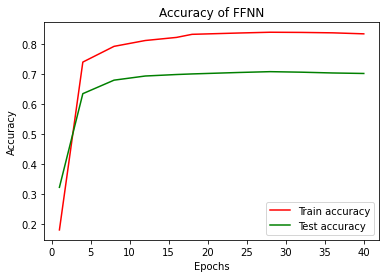

In [377]:
import matplotlib.pyplot as plt
Epochs = [1,4,8,12,16,18,24,28,32,36,40]

#From above results for Epochs = [1,4,8,12,16,18,24,28,32, 36, 40]
train_acc = [0.17993333333333333, 0.7398666666666667, 0.7923166666666667, 0.8118, 0.8221333333333334, 0.8324333333333334, 0.8368333333333333, 0.8393833333333334, 0.8388, 0.8374166666666667, 0.8340666666666666]                                                        
test_acc =  [0.3220060412224591, 0.6344838308457712, 0.6795486851457, 0.693363539445629, 0.6983386638237384, 0.7003153873489695, 0.7051572494669509, 0.7078891257995735, 0.7061345060412224, 0.7035136815920399, 0.7018479033404407	]
plt.plot(Epochs, train_acc, color='r', label='Train accuracy')
plt.plot(Epochs, test_acc, color='g', label='Test accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of FFNN")
plt.legend()
plt.show()

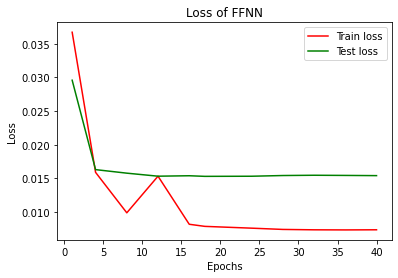

In [378]:
Epochs = [1,4,8,12,16,18,24,28,32,36,40]

#From above results for Epochs = [1,4,8,12,16,18,24,28,32]
train_loss = [0.03671650778046285, 0.01588836146417256, 0.009877385013661371, 0.015320755303899376, 0.008174984844729607, 0.007862129746045365, 0.0075948151891140694, 0.007407554645106296, 0.007350625659016208, 0.0073350274279245335, 0.007354650930800538]                                                        
test_loss = [0.029586172741662507, 0.01629581789182759, 0.015770750229172514, 0.015320755303899376, 0.015386856251757175, 0.015296074780825286, 0.015314182306889275, 0.015419787961046469, 0.015459724579355974, 0.015435128349202933, 0.015404586458198533]                                                               
plt.plot(Epochs, train_loss, color='r', label='Train loss')
plt.plot(Epochs, test_loss, color='g', label='Test loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of FFNN")
plt.legend()
plt.show()